numberOfElements = 9
numberOfInterfaceElements = 5
Density of medium:      1.205 kg/m^3
Speed of sound:         344.0 m/s
Wavenumber (Frequency): 0.18265073567382517 (10.0 Hz)

index   Potential               Pressure                 Velocity                 Intensity

    1  -1.9001e+00-2.0318e-01   1.5383e+01-1.4386e+02i   1.5680e+00+2.9612e-03i   1.1847e+01
    2  -1.8757e+00-2.0307e-01   1.5375e+01-1.4202e+02i   1.5199e+00+3.0768e-03i   1.1466e+01
    3  -1.8418e+00-2.0285e-01   1.5358e+01-1.3945e+02i   1.5965e+00+3.3232e-03i   1.2028e+01
    4  -1.7928e+00-2.0250e-01   1.5332e+01-1.3574e+02i   1.7596e+00+3.7238e-03i   1.3236e+01
    5  -1.7153e+00-2.0200e-01   1.5294e+01-1.2987e+02i   3.1437e+00+6.7830e-03i   2.3599e+01
    6  -1.9902e+00-2.0245e-01   1.5328e+01-1.5068e+02i  -1.0000e+00+0.0000e+00i  -7.6638e+00
    7  -2.3400e+00-2.0317e-01   1.5382e+01-1.7717e+02i  -1.0000e+00+0.0000e+00i  -7.6912e+00
    8  -2.5917e+00-2.0369e-01   1.5422e+01-1.9623e+02i  -1.0000e+00+0.0000e+00i

Text(0, 0.5, 'z-coordinate')

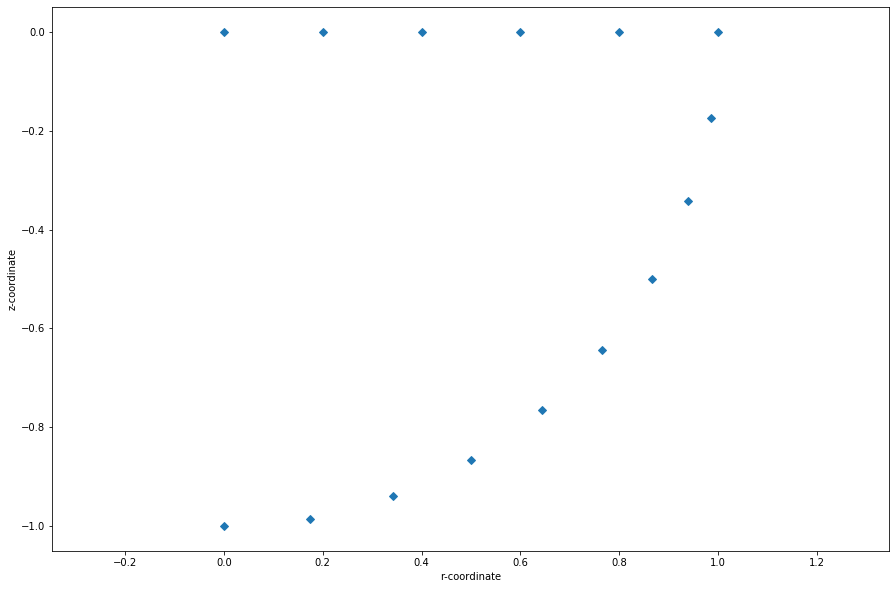

In [1]:
import abem as ab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = 10.0 # Hertz
k = ab.frequency_to_wavenumber(f)

solver = ab.RayleighCavitySolverRAD(ab.truncated_sphere_rad())
print("numberOfElements = {}".format(solver.len()))
print("numberOfInterfaceElements = {}".format(solver.number_of_interface_elements()))

boundary_condition = solver.neumann_boundary_condition()
boundary_condition.f.fill(-1.0)

exterior_points = np.array([[0.000, 0.100],
                           [0.000, 0.300],
                           [0.000, 0.500],
                           [0.000, 0.700],
                           [0.000, 0.900]], dtype=np.float32)

interior_points = np.array([[0.000, -0.900],
                           [0.000, -0.700],
                           [0.000, -0.500],
                           [0.000, -0.300],
                           [0.000, -0.100]], dtype=np.float32)

solution = solver.solve_boundary(k, boundary_condition)

print(solution)

interior_phi = solution.solve_cavity(interior_points)
print("Sound pressure at the interior points\n")
print(interior_phi)

exterior_phi = solution.solve_samples(exterior_points)
print("Sound pressure at the exterior points\n")
print(exterior_phi)

chain = ab.truncated_sphere_rad()
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(chain.vertices[:,0], chain.vertices[:,1], 'D', label='verts')
ax.set_aspect('equal', 'datalim')
ax.set_xlabel('r-coordinate')
ax.set_ylabel('z-coordinate')